# Metrics for prediction model based on 1h resolution

In [1]:
import datetime
import calendar
import time
import json
import numpy as np
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 4

# Load project

Load rainfall and flow data from the files and clean it by:
  * Resampling to 5 minutes
  * Slice to the common range
  * Fill NaNs

In [55]:
PROJECT_FOLDER = '../../datasets/radon-medium/'

flow = pd.read_csv(PROJECT_FOLDER + 'flow1.csv', parse_dates=['time'])
flow = flow.set_index('time').flow
flow = flow.resample('1H').mean()

rainfall = pd.read_csv(PROJECT_FOLDER + 'rainfall1.csv', parse_dates=['time'])
rainfall = rainfall.set_index('time').rainfall
rainfall = rainfall.resample('1H').mean()

data_frame = pd.concat([flow, rainfall], axis=1).dropna()
data_frame['day'] = data_frame.index.map(lambda x: x.date())
data_frame['hour'] = data_frame.index.map(lambda x: x.time().hour)
data_frame = data_frame['2015-01-01':'2018-07-05']
print(data_frame.head())
print(data_frame.tail())

                          flow  rainfall         day  hour
time                                                      
2015-01-01 00:00:00  76.796188       0.0  2015-01-01     0
2015-01-01 01:00:00  71.892892       0.0  2015-01-01     1
2015-01-01 02:00:00  63.906876       0.0  2015-01-01     2
2015-01-01 03:00:00  60.286973       0.0  2015-01-01     3
2015-01-01 04:00:00  57.049687       0.0  2015-01-01     4
                          flow  rainfall         day  hour
time                                                      
2018-04-13 04:00:00  43.278284       0.0  2018-04-13     4
2018-04-13 05:00:00  41.779852       0.0  2018-04-13     5
2018-04-13 06:00:00  49.345211       0.0  2018-04-13     6
2018-04-13 07:00:00  67.298808       0.0  2018-04-13     7
2018-04-13 08:00:00  75.363243       0.0  2018-04-13     8


## Prepare functions for calculating model score

The basic prediction model uses daily pattern as a prediction

In [56]:
def loss(y_hat, y):
    """
    https://en.wikipedia.org/wiki/Mean_absolute_percentage_error
    """
    return 100.0 * np.sum(np.abs((y-y_hat) / y)) / y.shape[0]


err = loss(np.array([1,1,1]), np.array([2,2,2]))
print("loss 50.0 == {}".format(err))

loss 50.0 == 50.0


# Evaluate dataset


Use all data before 2018-01-01 as training set and later data as test set

In [57]:
train_data = data_frame[data_frame.day < datetime.date(2018,1,1)]
test_data = data_frame[data_frame.day >= datetime.date(2018,1,1)]
print(train_data.tail())
print(test_data.head())
x_train = train_data[['hour']]
y_train = train_data['flow']
x_test = test_data[['hour']]
y_test = test_data['flow']

                          flow  rainfall         day  hour
time                                                      
2017-12-03 19:00:00  76.851403       0.0  2017-12-03    19
2017-12-03 20:00:00  81.333705       0.0  2017-12-03    20
2017-12-03 21:00:00  84.180263       0.0  2017-12-03    21
2017-12-03 22:00:00  82.342646       0.0  2017-12-03    22
2017-12-03 23:00:00  72.624863       0.0  2017-12-03    23
                          flow  rainfall         day  hour
time                                                      
2018-03-01 00:00:00  63.987647       0.0  2018-03-01     0
2018-03-01 01:00:00  56.025623       0.0  2018-03-01     1
2018-03-01 02:00:00  50.192542       0.0  2018-03-01     2
2018-03-01 03:00:00  46.678541       0.0  2018-03-01     3
2018-03-01 04:00:00  43.955056       0.0  2018-03-01     4


# Test mean model

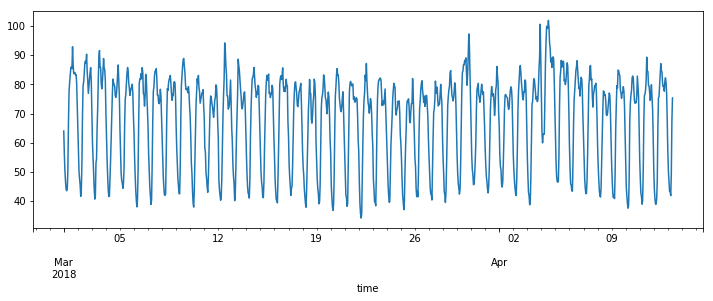

In [58]:
y_test.plot()
plt.show()

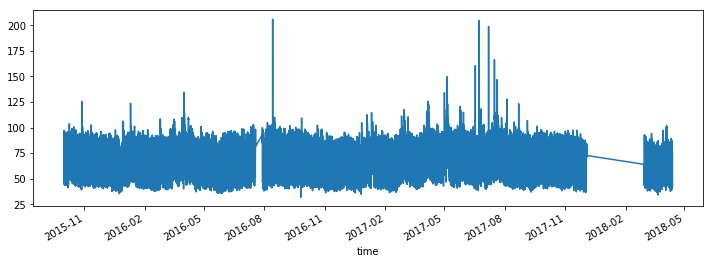

In [64]:
data_frame['2015-10-01':].flow.plot()
plt.show()

In [65]:
mu = y_train.mean()
y_hat = np.ones(len(y_test)) * mu
loss(y_hat, y_test)

23.594115993557622